# Trabajo Práctico de  Analisis Numérico 

## Integrantes 
### Ayala Ulises 
### Fernandez Adrea 
### Paredes Samuel 
### Sanchez Franco

## Año: 2024

# **Actividades de aplicación**
___

## **Parte 1:  Derivación Numérica**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Función original
def funcion(x):
    return ((3 * x - 1) / (x ** 2 + 3)) ** 2

# Derivada analítica
def derivada_analitica(x):
    return (-18 + 50 * x + 18 * x ** 2 - 18 * x ** 3) / ((x ** 2 + 3) ** 3)

# Métodos numéricos
def diferencia_hacia_adelante(funcion, x, h):
    return (funcion(x + h) - funcion(x)) / h

def diferencia_hacia_atras(funcion, x, h):
    return (funcion(x) - funcion(x - h)) / h

def diferencia_centrada(funcion, x, h):
    return (funcion(x + h) - funcion(x - h)) / (2 * h)

# Parámetros
x = 1
h = 0.1

# Resultados
adelante = diferencia_hacia_adelante(funcion, x, h)
atras = diferencia_hacia_atras(funcion, x, h)
centrada = diferencia_centrada(funcion, x, h)
exacta = derivada_analitica(x)

# Errores relativos
error_adelante = abs((adelante - exacta) / exacta)
error_atras = abs((atras - exacta) / exacta)
error_centrada = abs((centrada - exacta) / exacta)

print("Resultados:")
print(f"Analítica: {exacta}")
print(f"Hacia adelante: {adelante}, Error relativo: {error_adelante}")
print(f"Hacia atrás: {atras}, Error relativo: {error_atras}")
print(f"Centrada: {centrada}, Error relativo: {error_centrada}")


Resultados:
Analítica: 0.5
Hacia adelante: 0.4846367375494387, Error relativo: 0.0307265249011226
Hacia atrás: 0.5091071293253696, Error relativo: 0.018214258650739223
Centrada: 0.49687193343740416, Error relativo: 0.006256133125191687


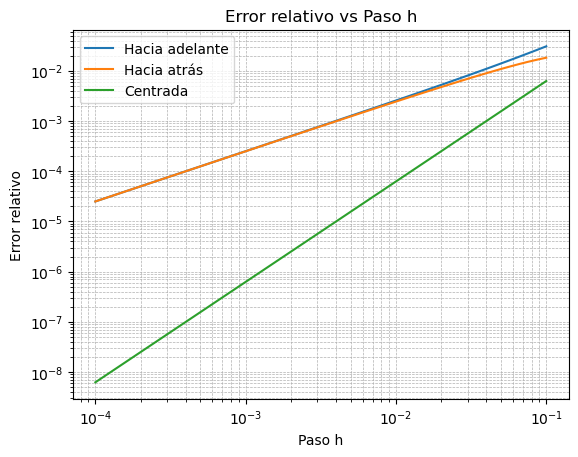

In [5]:

# Valores de h
valores_h = np.logspace(-4, -1, 50)

# Listas para almacenar los errores relativos
errores_adelante, errores_atras, errores_centrada = [], [], []

# Calculamos los errores relativos para cada valor de h
for h in valores_h:
    errores_adelante.append(abs((diferencia_hacia_adelante(funcion, x, h) - exacta) / exacta))
    errores_atras.append(abs((diferencia_hacia_atras(funcion, x, h) - exacta) / exacta))
    errores_centrada.append(abs((diferencia_centrada(funcion, x, h) - exacta) / exacta))

# Graficamos los errores relativos en una escala log-log
plt.loglog(valores_h, errores_adelante, label='Hacia adelante')
plt.loglog(valores_h, errores_atras, label='Hacia atrás')
plt.loglog(valores_h, errores_centrada, label='Centrada')
plt.xlabel("Paso h")
plt.ylabel("Error relativo")
plt.legend()
plt.title("Error relativo vs Paso h")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


### **Análisis de los Resultados**
**1. Comparación de los métodos numéricos con la derivada analítica en x=1:**
* Derivada analítica: f′(1)=0.5f'(1) = 0.5f′(1)=0.5
* Derivada por diferencias hacia adelante: 0.48460.48460.4846  
Error relativo: 3.07%3.07\%3.07%.  
Este método tiene el error más alto debido a que utiliza una aproximación basada en un valor hacia adelante, lo que lo hace menos preciso en comparación con otros métodos.
* Derivada por diferencias hacia atrás: 0.50910.50910.5091  
Error relativo: 1.82%1.82\%1.82%.  
Este método es más preciso que el anterior, pero aún tiene un error significativo, ya que considera solo un valor hacia atrás.
* Derivada por diferencias centradas: 0.49690.49690.4969  
Error relativo: 0.63%0.63\%0.63%.  
Este es el método más preciso, ya que toma en cuenta valores hacia adelante y hacia atrás, lo que reduce considerablemente el error.
  
**Conclusión**: Entre los métodos, el de diferencias centradas es el más cercano a la derivada analítica, ya que minimiza los errores de truncamiento al usar información simétrica alrededor del punto de interés.


### **Análisis de la gráfica de error relativo vs h:**

**1. Comportamiento general de los errores:**  
* Los errores relativos disminuyen a medida que el paso h se reduce, lo cual es esperado porque h más pequeño mejora la precisión de los métodos numéricos.
* Sin embargo, al reducir demasiado h, los errores empiezan a aumentar nuevamente debido a errores de redondeo en las operaciones numéricas. Esto genera un punto óptimo de h donde el error relativo es mínimo.<br>

**2. Comparación entre métodos:**  
* Hacia adelante: Presenta errores más altos en comparación con los otros métodos para valores grandes de h, pero mejora rápidamente conforme h disminuye.  
* Hacia atrás: Tiene un comportamiento similar al método hacia adelante, pero con errores ligeramente menores debido a su construcción.  
* Centrada: Se mantiene como el método más preciso para todos los valores de h, mostrando una pendiente más suave en la gráfica y menor error relativo en comparación con los otros métodos.<br>

**3. Conclusión de la gráfica**  
* La gráfica confirma que el método de diferencias centradas es el más confiable y robusto para estimar la derivada, especialmente para valores intermedios de h.  
* El error relativo mínimo se alcanza en un rango específico de h (alrededor de h ≈ 10^−2), donde se equilibran los errores de truncamiento y redondeo


### **Conclusión Final**
* El método de diferencias centradas es el más preciso y eficiente para aproximar derivadas, especialmente cuando el tamaño del paso ℎ se elige adecuadamente.  
* Los métodos de diferencias hacia adelante y hacia atrás pueden ser útiles, pero su precisión es más sensible al tamaño de ℎ, y tienden a tener errores mayores en comparación con el método centrado.  
* La gráfica de errores relativos muestra claramente cómo los métodos numéricos se comportan con distintos tamaños de ℎ, destacando la importancia de seleccionar un paso 
ℎ óptimo para minimizar los errores.

## **Parte 2:  Integración Numérica**

In [ ]:
import numpy as np

# Función a integrar
def funcion(x):
    return x**3 / (1 + np.sqrt(x))

# Límites de integración
a = 1
b = 2
h = 0.25
n = int((b - a) / h)  # Número de subintervalos

# Método del trapecio
def regla_trapecio(funcion, a, b, h, n):
    x = np.linspace(a, b, n + 1)  # Generar puntos en [a, b]
    y = funcion(x)
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

# Regla de Simpson 1/3
def regla_simpson_1_3(funcion, a, b, h, n):
    if n % 2 != 0:
        return ValueError("El número de intervalos debe ser par para Simpson 1/3.")
    x = np.linspace(a, b, n + 1)  # Generar puntos en [a, b]
    y = funcion(x)
    return (h / 3) * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]))

# Regla de Simpson 3/8
def regla_simpson_3_8(funcion, a, b, h, n):
    if n % 3 != 0:
        return ValueError("El número de intervalos debe ser múltiplo de 3 para Simpson 3/8.")
    x = np.linspace(a, b, n + 1)  # Generar puntos en [a, b]
    y = funcion(x)
    return (3 * h / 8) * (y[0] + 3 * np.sum(y[1:-1]) - np.sum(y[3:-1:3]) + y[-1])

# Cálculos
resultado_trapecio = regla_trapecio(funcion, a, b, h, n)
resultado_simpson_1_3 = regla_simpson_1_3(funcion, a, b, h, n)
resultado_simpson_3_8 = regla_simpson_3_8(funcion, a, b, h, n)

print("Resultados:")
print(f"Regla del trapecio: {resultado_trapecio}")
print(f"Regla de Simpson 1/3: {resultado_simpson_1_3}")
print(f"Regla de Simpson 3/8: {resultado_simpson_3_8}")

Resultados:
Regla del trapecio: 1.6633095725796718
Regla de Simpson 1/3: 1.6470990748752943
Regla de Simpson 3/8: El número de intervalos debe ser múltiplo de 3 para Simpson 3/8.


In [41]:
from sympy import symbols, integrate, sqrt

# Definición simbólica
x = symbols('x')
integral_exacta = integrate(x**3 / (1 + sqrt(x)), (x, a, b))
valor_exacto = float(integral_exacta.evalf())

print(f"Solución exacta: {valor_exacto}")


Solución exacta: 1.6471079516408622


In [42]:
errores = {}
if isinstance(resultado_trapecio, float) and isinstance(valor_exacto, float):
    error_trapecio = abs((resultado_trapecio - valor_exacto) / valor_exacto)
    errores['Trapecio'] = error_trapecio
    print(f"Trapecio: {error_trapecio}")
else:
    print("Error en el cálculo de la regla del trapecio.")

if isinstance(resultado_simpson_1_3, float) and isinstance(valor_exacto, float):
    error_simpson_1_3 = abs((resultado_simpson_1_3 - valor_exacto) / valor_exacto)
    errores['Simpson 1/3'] = error_simpson_1_3
    print(f"Simpson 1/3: {error_simpson_1_3}")
else:
    print("Error en el cálculo de la regla de Simpson 1/3.")

if isinstance(resultado_simpson_3_8, float) and isinstance(valor_exacto, float):
    error_simpson_3_8 = abs((resultado_simpson_3_8 - valor_exacto) / valor_exacto)
    errores['Simpson 3/8'] = error_simpson_3_8
    print(f"Simpson 3/8: {error_simpson_3_8}")
else:
    print("Error en el cálculo de la regla de Simpson 3/8.")

Trapecio: 0.009836405028990011
Simpson 1/3: 5.389304058116088e-06
Error en el cálculo de la regla de Simpson 3/8.


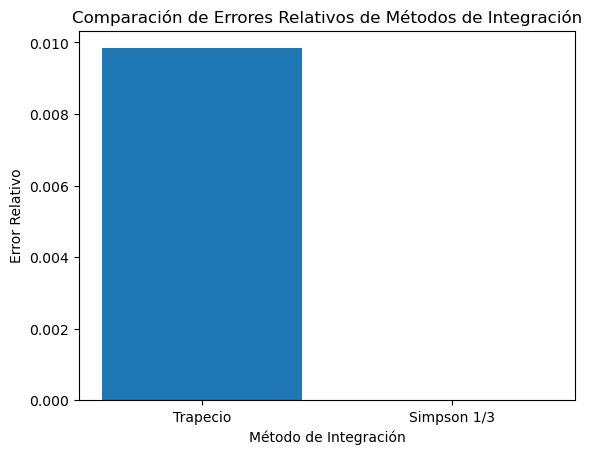

In [43]:
# Graficar los errores relativos
plt.bar(errores.keys(), errores.values())
plt.xlabel("Método de Integración")
plt.ylabel("Error Relativo")
plt.title("Comparación de Errores Relativos de Métodos de Integración")
plt.show()

### **Análisis: Comparación de Resultados Numéricos con la Solución Exacta**
1. **Resultados obtenidos:** 
* Solución exacta: 1.6471079516408622
* Regla del trapecio: 1.6633095725796718 (error relativo: 0.009836)
* Regla de Simpson 1/3: 1.6470990748752943 (error relativo: 5.39 × 10⁻⁶)
* Regla de Simpson 3/8: No se pudo calcular debido a que el número de intervalos no es múltiplo de 3, lo cual es un requisito para este método.

2. **Análisis de precisión:** 
* La regla del trapecio es menos precisa, presentando un error relativo del 0.98%. Esto se debe a que este método aproxima la curva utilizando segmentos lineales, lo que genera una mayor discrepancia para funciones más curvas como la dada.
* La regla de Simpson 1/3 muestra un error extremadamente pequeño (5.39 × 10⁻⁶), indicando que es mucho más precisa. Esto se debe a que utiliza aproximaciones parabólicas, que se adaptan mejor a las curvas de la función.

3. **Conclusión general:**
* La regla de Simpson 1/3 es significativamente más precisa para este problema que la regla del trapecio, como lo evidencian los errores relativos.
* La regla de Simpson 3/8 no pudo ser utilizada debido a las restricciones del número de intervalos, lo que subraya la importancia de verificar las condiciones antes de implementar un método.
* El gráfico de errores refuerza visualmente la precisión superior de Simpson 1/3 frente al trapecio.



## **Parte 3: Resolución de Ecuaciones Diferenciales Ordinarias**

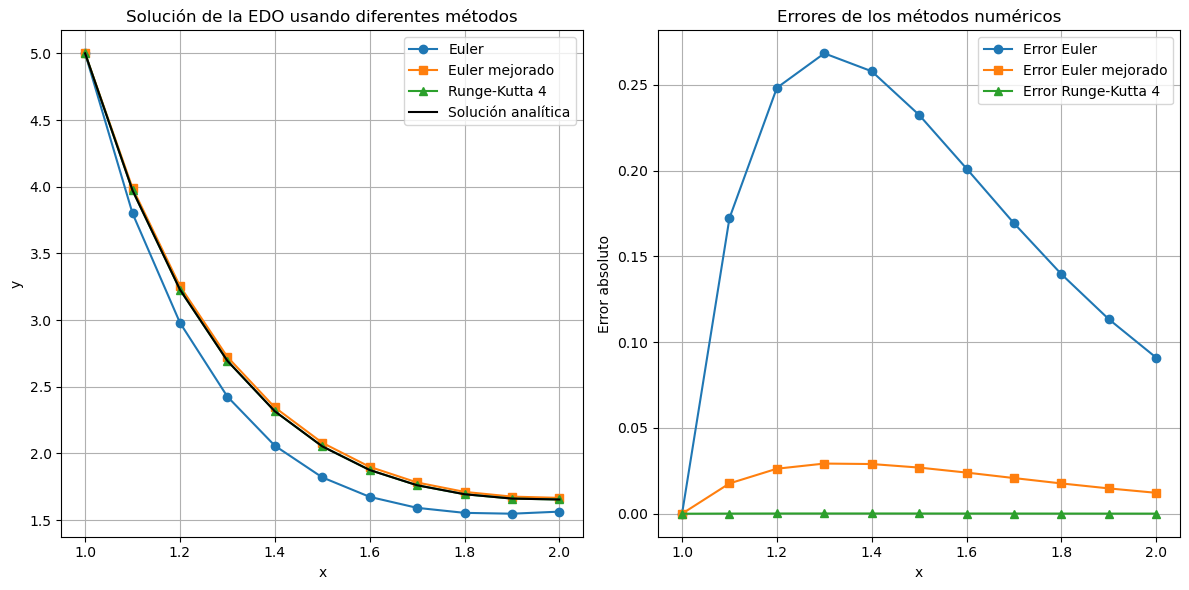

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la ecuación diferencial
def dy_dx(x, y):
    return 2 * x - 3 * y + 1

# Solución analítica
def solucion_analitica(x):
    C = (38 / 9) * np.exp(3)
    y = (6 * x + 1) / 9 + C * np.exp(-3 * x)
    return y

# Método de Euler
def euler(f, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0], y[0] = x0, y0
    for i in range(n):
        y[i + 1] = y[i] + h * f(x[i], y[i])
        x[i + 1] = x[i] + h
    return x, y

# Método de Euler mejorado
def euler_mejorado(f, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0], y[0] = x0, y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h * k1)
        y[i + 1] = y[i] + (h / 2) * (k1 + k2)
        x[i + 1] = x[i] + h
    return x, y

# Método de Runge-Kutta de orden 4
def runge_kutta_4(f, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0], y[0] = x0, y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 2, y[i] + h * k1 / 2)
        k3 = f(x[i] + h / 2, y[i] + h * k2 / 2)
        k4 = f(x[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        x[i + 1] = x[i] + h
    return x, y

# Parámetros
x0 = 1
y0 = 5
h = 0.1
x_final = 2
n_pasos = int((x_final - x0) / h)

# Soluciones numéricas
x_euler, y_euler = euler(dy_dx, x0, y0, h, n_pasos)
x_euler_mejorado, y_euler_mejorado = euler_mejorado(dy_dx, x0, y0, h, n_pasos)
x_rk4, y_rk4 = runge_kutta_4(dy_dx, x0, y0, h, n_pasos)

# Solución analítica
x_analitico = np.linspace(x0, x_final, n_pasos + 1)
y_analitico = solucion_analitica(x_analitico)

# Cálculo de errores
error_euler = np.abs(y_analitico - y_euler)
error_euler_mejorado = np.abs(y_analitico - y_euler_mejorado)
error_rk4 = np.abs(y_analitico - y_rk4)

# Gráfica de soluciones y errores
plt.figure(figsize=(12, 6))

# Soluciones numéricas y analítica
plt.subplot(1, 2, 1)
plt.plot(x_euler, y_euler, 'o-', label='Euler')
plt.plot(x_euler_mejorado, y_euler_mejorado, 's-', label='Euler mejorado')
plt.plot(x_rk4, y_rk4, '^-', label='Runge-Kutta 4')
plt.plot(x_analitico, y_analitico, 'k', label='Solución analítica')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución de la EDO usando diferentes métodos')
plt.legend()
plt.grid(True)

# Errores de los métodos numéricos
plt.subplot(1, 2, 2)
plt.plot(x_euler, error_euler, 'o-', label='Error Euler')
plt.plot(x_euler_mejorado, error_euler_mejorado, 's-', label='Error Euler mejorado')
plt.plot(x_rk4, error_rk4, '^-', label='Error Runge-Kutta 4')
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.title('Errores de los métodos numéricos')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### **Análisis de los resultados obtenidos con la solución analítica**

En esta parte del ejercicio se compararon las soluciones obtenidas mediante los métodos de Euler, Euler mejorado y Runge-Kutta de orden 4 con la solución analítica de la ecuación diferencial dada:  

1. **Método de Euler:**  El método de Euler tiene una aproximación bastante sencilla y, aunque es útil, produce errores significativos. Los errores aumentan a medida que nos alejamos del valor inicial (x = 1). La solución obtenida no coincide perfectamente con la analítica, mostrando una desviación más grande que los otros métodos.

2. **Método de Euler Mejorado:**  Este método ofrece una mejora respecto al método de Euler, ya que utiliza una aproximación más precisa mediante el promedio de las pendientes en dos puntos. Como resultado, el error es menor que en el caso de Euler, y la aproximación es más cercana a la solución analítica.

3. **Método de Runge-Kutta de Orden 4:** Este es el método más preciso de los tres y genera una solución muy cercana a la analítica. Los errores son mucho más pequeños en comparación con los métodos anteriores, lo que lo convierte en el más adecuado para este tipo de problemas, especialmente cuando se requiere una mayor precisión.

**Conclusión**  
En resumen, la comparación muestra que el método de Runge-Kutta de orden 4 es el más preciso de los tres métodos utilizados, proporcionando resultados muy cercanos a la solución exacta de la ecuación diferencial. El método de Euler es el menos preciso, mientras que el método de Euler mejorado ofrece una mejora significativa respecto al primero, pero sigue siendo inferior a Runge-Kutta. Esto demuestra la ventaja de métodos más avanzados como el de Runge-Kutta para obtener soluciones con mayor precisión en ecuaciones diferenciales ordinarias.